In [16]:
%matplotlib inline
from bokeh.io import output_notebook
from bokeh.plotting import *
from matmodlab2 import *
from numpy import *
output_notebook()
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

Loading BokehJS ...

In [2]:

full_sdv_column_names =  [
            # ADDED
            "TIME",
            "DTIME",
            "REAL_SXX",
            "REAL_SYY",
            "REAL_SZZ",
            "REAL_SXY",
            "REAL_SYZ",
            "REAL_SXZ",
            # BEGIN ACTUAL MAT SDVS
            "FICT_EP_XX",  # 0
            "FICT_EP_YY",  # 1
            "FICT_EP_ZZ",  # 2
            "FICT_EP_XY",  # 3
            "FICT_EP_YZ",  # 4
            "FICT_EP_XZ",  # 5
            "FICT_EQPS",   # 6
            "REAL_EP_XX",  # 7
            "REAL_EP_YY",  # 8
            "REAL_EP_ZZ",  # 9
            "REAL_EP_XY",  # 10
            "REAL_EP_YZ",  # 11
            "REAL_EP_XZ",  # 12
            "REAL_EQPS",   # 13
            "Y",           # 14
            "S.VM",        # 15
            # SDVS ABOVE HERE ARE HARD CODED, do not modify SDVs above this line
            "FICT_SXX",    
            "FICT_SYY",
            "FICT_SZZ",
            "FICT_SXY",
            "FICT_SYZ",
            "FICT_SXZ", 
            "TRIAL_STRESS_POST_TRANS_XX",
            "TRIAL_STRESS_POST_TRANS_YY",
            "TRIAL_STRESS_POST_TRANS_ZZ",
            "TRIAL_STRESS_POST_TRANS_XY",
            "TRIAL_STRESS_POST_TRANS_YZ",
            "TRIAL_STRESS_POST_TRANS_XZ",
            "MML_STRESS_GUESS_XX",    
            "MML_STRESS_GUESS_YY", 
            "MML_STRESS_GUESS_ZZ", 
            "MML_STRESS_GUESS_XY",    
            "MML_STRESS_GUESS_YZ", 
            "MML_STRESS_GUESS_XZ", 
            "TRIAL_STRESS_PRE_TRANS_XX",   
            "TRIAL_STRESS_PRE_TRANS_YY",   
            "TRIAL_STRESS_PRE_TRANS_ZZ",   
            "TRIAL_STRESS_PRE_TRANS_XY",   
            "TRIAL_STRESS_PRE_TRANS_YZ",   
            "TRIAL_STRESS_PRE_TRANS_XZ",   
            "CONV_STRESS_ISO_XX", 
            "CONV_STRESS_ISO_YY", 
            "CONV_STRESS_ISO_ZZ", 
            "CONV_STRESS_ISO_XY", 
            "CONV_STRESS_ISO_YZ", 
            "CONV_STRESS_ISO_XZ", 
            "FICT_EQPS_INPUT", 
            "DELTA_EXX", 
            "DELTA_EYY", 
            "DELTA_EZZ", 
            "DELTA_EXY", 
            "DELTA_EYZ", 
            "DELTA_EXZ", 
            'DELTA_SXX',
            'DELTA_SYY',
            'DELTA_SZZ',
            'DELTA_SXY',
            'DELTA_SYZ',
            'DELTA_SXZ',
        ]
column_reorder = [ 'TIME', 'DTIME',
                    'MML_STRESS_GUESS_XX',
                    'MML_STRESS_GUESS_YY',
                    'MML_STRESS_GUESS_ZZ',
                    "MML_STRESS_GUESS_XY",    
                    "MML_STRESS_GUESS_YZ", 
                    "MML_STRESS_GUESS_XZ", 
                    'DELTA_EXX',
                    'DELTA_EYY',
                    'DELTA_EZZ',
                    "DELTA_EXY", 
                    "DELTA_EYZ", 
                    "DELTA_EXZ", 
                    'TRIAL_STRESS_PRE_TRANS_XX',
                    'TRIAL_STRESS_PRE_TRANS_YY',
                    'TRIAL_STRESS_PRE_TRANS_ZZ',
                    "TRIAL_STRESS_PRE_TRANS_XY",   
                    "TRIAL_STRESS_PRE_TRANS_YZ",   
                    "TRIAL_STRESS_PRE_TRANS_XZ",   
                    'DELTA_SXX',
                    'DELTA_SYY',
                    'DELTA_SZZ',
                    'DELTA_SXY',
                    'DELTA_SYZ',
                    'DELTA_SXZ',
                    'TRIAL_STRESS_POST_TRANS_XX',
                    'TRIAL_STRESS_POST_TRANS_YY',
                    'TRIAL_STRESS_POST_TRANS_ZZ',
                    "TRIAL_STRESS_PRE_TRANS_XY",   
                    "TRIAL_STRESS_PRE_TRANS_YZ",   
                    "TRIAL_STRESS_PRE_TRANS_XZ",   
                    'CONV_STRESS_ISO_XX',
                    'CONV_STRESS_ISO_YY',
                    'CONV_STRESS_ISO_ZZ',
                    "CONV_STRESS_ISO_XY", 
                    "CONV_STRESS_ISO_YZ", 
                    "CONV_STRESS_ISO_XZ", 
                    'FICT_SXX',
                    'FICT_SYY',
                    'FICT_SZZ',
                    "FICT_SXY",
                    "FICT_SYZ",
                    "FICT_SXZ", 
                    "FICT_EP_XX",  # 0
                    "FICT_EP_YY",  # 1
                    "FICT_EP_ZZ",  # 2
                    'REAL_EP_XX',
                    'REAL_EP_YY',
                    'REAL_EP_ZZ',
                    "REAL_SXX",
                    "REAL_SYY",
                    "REAL_SZZ",
                    "REAL_SXY",
                    "REAL_SYZ",
                    "REAL_SXZ",
                    'S.VM',]
def run_ST_GPSR_TTM(property_dict, loads='ESS', components=(0.02, 0, 0), frames=50):
    mps1 = MaterialPointSimulator('ST_GPSR_TTM')
    mps1.material = ST_GPSR_TTM(**property_dict)
    mps1.run_step(loads,  components, frames=frames)
    return mps1

def run_CPA_alg(property_dict, loads='ESS', components=(0.02, 0, 0), frames=50):
    mps1 = MaterialPointSimulator('CPAPlasticitiy')
    mps1.material = ST_GPSR_TTM(**property_dict)
    mps1.run_step(loads,  components, frames=frames)
    return mps1

def run_generic_mps(mps1, property_dict, loads='ESS', components=(0.02, 0, 0), frames=50):
    mps1.run_step(loads,  components, frames=frames)
    return mps1

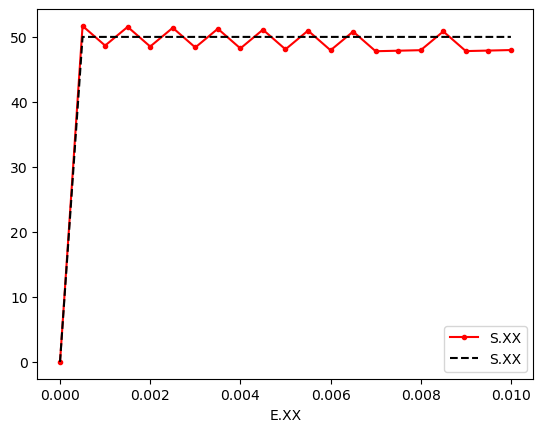

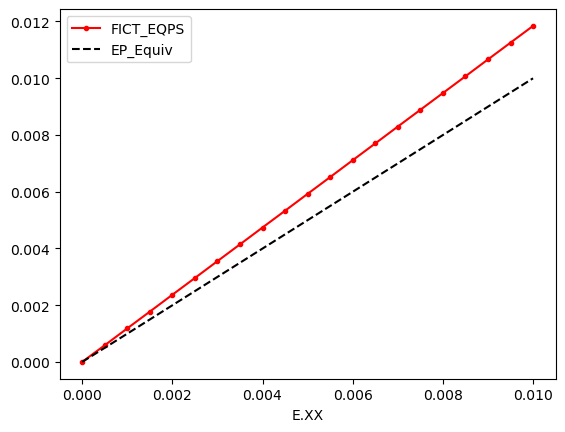

In [3]:

def B(eqps):
    alpha = 69*np.pi/180
    B_in = np.array([ [1,0,0], [0, cos(alpha), -sin(alpha)], [ 0, sin(alpha), cos(alpha) ] ])
    #B_in = np.transpose(B_in) @ np.eye(3) @ B_in
    #print(B_in)
    return B_in

# Shared params
E = 10e6
nu = .333
Y0 = 50
H = 0

all_comps = (0.01, 0, 0)
all_loads = 'ESS'
all_frames = 20

# Run ST_GPSR_TTM model
pGPSR = {'E': E, 'Nu': nu, 'Y0': Y0, 'H': H, "B": B}
mpsGPSR = run_ST_GPSR_TTM(pGPSR, frames=all_frames, components=all_comps, loads=all_loads)
# Run the included von mises model
pVM = {'E': E, 'Nu': nu, 'Y0': Y0, 'Y1': H, 'm': 1.0}
mpsVM = MaterialPointSimulator('VM_Plastic')
mpsVM.material = HardeningPlasticMaterial(**pVM)
mpsVM = run_generic_mps(mpsVM, pVM, frames=all_frames, components=all_comps, loads=all_loads)

ax = mpsGPSR.plot('E.XX', 'S.XX', style='.r-')
mpsVM.plot('E.XX', 'S.XX', ax=ax, style='k--')

ax2 = mpsGPSR.plot('E.XX', 'FICT_EQPS', style='.r-')
mpsVM.plot('E.XX', 'EP_Equiv', ax=ax2, style='k--')

# print(mpsGPSR.df[['FICT_EQPS', 'Y']])
# print(mpsVM.df[['EP_Equiv', 'S.XX']])
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     df = mpsGPSR.df[['E.XX', 'MML_STRESS_GUESS',  'TRIAL_STRESS_PRE_TRANS', 'FICT_EQPS_INPUT', 'TRIAL_STRESS_POST_TRANS', 'CONV_STRESS_ISO', 'CONV_STRESS_REAL', 'FICT_EQPS', 'S.XX', 'DELTA_EXX', 'DELTA_EYY', 'DELTA_EZZ']]
#     df.to_csv('output1.csv')
#     print(df)
df_full = pd.DataFrame(mpsGPSR.material.full_sdv_storage, columns=full_sdv_column_names)
df_full = df_full[column_reorder]
df_full.to_csv('full_shabang_0.csv')


with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    df_vm_reference = mpsGPSR.df[['E.XX', 
                    'MML_STRESS_GUESS_XX',
                    'MML_STRESS_GUESS_YY',
                    'MML_STRESS_GUESS_ZZ',
                    "MML_STRESS_GUESS_XY",    
                    "MML_STRESS_GUESS_YZ", 
                    "MML_STRESS_GUESS_XZ", 
                    'DELTA_EXX',
                    'DELTA_EYY',
                    'DELTA_EZZ',
                    "DELTA_EXY", 
                    "DELTA_EYZ", 
                    "DELTA_EXZ", 
                    'TRIAL_STRESS_PRE_TRANS_XX',
                    'TRIAL_STRESS_PRE_TRANS_YY',
                    'TRIAL_STRESS_PRE_TRANS_ZZ',
                    "TRIAL_STRESS_PRE_TRANS_XY",   
                    "TRIAL_STRESS_PRE_TRANS_YZ",   
                    "TRIAL_STRESS_PRE_TRANS_XZ",   
                    'DELTA_SXX',
                    'DELTA_SYY',
                    'DELTA_SZZ',
                    'DELTA_SXY',
                    'DELTA_SYZ',
                    'DELTA_SXZ',
                    'TRIAL_STRESS_POST_TRANS_XX',
                    'TRIAL_STRESS_POST_TRANS_YY',
                    'TRIAL_STRESS_POST_TRANS_ZZ',
                    "TRIAL_STRESS_PRE_TRANS_XY",   
                    "TRIAL_STRESS_PRE_TRANS_YZ",   
                    "TRIAL_STRESS_PRE_TRANS_XZ",   
                    'CONV_STRESS_ISO_XX',
                    'CONV_STRESS_ISO_YY',
                    'CONV_STRESS_ISO_ZZ',
                    "CONV_STRESS_ISO_XY", 
                    "CONV_STRESS_ISO_YZ", 
                    "CONV_STRESS_ISO_XZ", 
                    'FICT_SXX',
                    'FICT_SYY',
                    'FICT_SZZ',
                    "FICT_SXY",
                    "FICT_SYZ",
                    "FICT_SXZ", 
                    "FICT_EP_XX",  # 0
                    "FICT_EP_YY",  # 1
                    "FICT_EP_ZZ",  # 2
                    'REAL_EP_XX',
                    'REAL_EP_YY',
                    'REAL_EP_ZZ',
                    'S.XX',
                    'S.YY',
                    'S.ZZ',
                    'S.YZ',
                    'S.XZ',
                    'S.XY',
                    'S.VM']]
    df_vm_reference.to_csv('output0.csv')


In [19]:
time_zero = df_full[df_full['TIME'] == 0]
dtime = time_zero[time_zero['DTIME'] == 0.05]
display(dtime[['DELTA_EXX', 'DELTA_EYY', 'DELTA_EZZ']])

,DELTA_EXX,DELTA_EYY,DELTA_EZZ
12,0.0005,0.000000e+00,0.000000e+00
13,0.0005,0.000000e+00,0.000000e+00
14,0.0005,7.450581e-09,0.000000e+00
15,0.0005,-7.450581e-09,0.000000e+00
16,0.0005,0.000000e+00,7.450581e-09
...,...,...,...
70,0.0005,-4.775391e-04,7.084961e-05
71,0.0005,-4.798828e-04,6.870117e-05
72,0.0005,-4.744629e-04,6.741943e-05
73,0.0005,-4.719238e-04,6.141357e-05
